# __Import Libraries__

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score, f1_score

import warnings
warnings.filterwarnings('ignore')

# __Load Dataset__

In [2]:
bank = pd.read_csv('bank-additional-full.csv', sep = ';')
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
bank1 = bank.copy()

# __Drop Unknown__

In [6]:
columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

for i in columns:
    bank1.drop(index=bank1[bank1[i] == 'unknown'].index, inplace=True)

In [7]:
bank1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [8]:
bank1.to_csv('bank.csv')

# **Exploratory Data Analysis**

### Central Tendency

In [9]:
print("Min Age  :   ", bank1['age'].min())
print("Max Age  :  ", bank1['age'].max())
print("Modus Age :", bank1['age'].mode()[0])
print("Median Age :", bank1['age'].median())
print("Mean Age :   ", bank1['age'].mean())
print("STD Age  :   ", bank1['age'].std())
# Std close to the mean means that the data values are close to the mean 

Min Age  :    17
Max Age  :   95
Modus Age : 31
Median Age : 37.0
Mean Age :    39.03001180792443
STD Age  :    10.333529228963052


### Distribusi Age tidak terdistribusi normal karena memiliki skewness kurang dari 1 dan p value normal test tidak lebih dari 0.05.

In [10]:
print("Skew Age =", bank1['age'].skew())

Skew Age = 0.9802100594305216


In [11]:
h = bank1['age']
k1, p1 = stats.normaltest(h)
alpha = 0.05
print(f"p = {p1}")

if p1 > alpha:
    print("Terdistribusi normal")
else:
    print("Tidak terdistribusi normal")

p = 0.0
Tidak terdistribusi normal


### Find Outliers

In [12]:
def find_outlier(yourList):
    q1 = yourList.describe()['25%']
    q2 = yourList.describe()['50%']
    q3 = yourList.describe()['75%']
    iqr = q3 - q1
    batas_bawah = q1 - 1.5 * iqr
    batas_atas = q3 + 1.5 * iqr
    outlier = []
    for i in yourList:
        if i < batas_bawah or i > batas_atas:
            outlier.append(i)
    return outlier

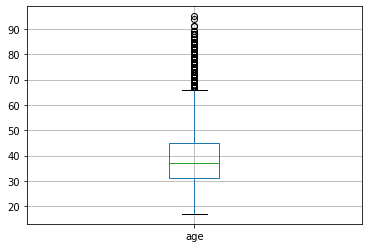

Median = 37.0
IQR = 14.0
Jumlah Outlier = 458
Outlier = [70, 76, 67, 73, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 95, 70, 70, 70, 68, 75, 70, 70, 68, 73, 72, 67, 73, 71, 69, 70, 67, 70, 70, 67, 71, 75, 68, 73, 68, 73, 71, 75, 69, 69, 75, 78, 75, 70, 78, 75, 78, 85, 85, 80, 71, 85, 85, 69, 79, 77, 83, 81, 71, 81, 69, 73, 71, 71, 88, 81, 81, 83, 75, 78, 68, 88, 77, 72, 79, 69, 69, 69, 74, 75, 68, 72, 72, 74, 74, 74, 74, 76, 76, 82, 75, 70, 73, 73, 73, 73, 76, 69, 67, 70, 69, 85, 69, 67, 70, 74, 74, 76, 88, 74, 81, 76, 74, 76, 73, 72, 70, 71, 70, 70, 68, 76, 72, 73, 67, 80, 74, 67, 74, 80, 74, 74, 71, 76, 76, 87, 79, 70, 69, 88, 81, 67, 80, 80, 78, 71, 71, 73, 73, 79, 71, 72, 71, 68, 71, 76, 71, 69, 91, 91, 76, 69, 69, 73, 76, 73, 69, 70, 70, 70, 70, 70, 70, 68, 70, 68, 81, 68, 68, 70, 70, 69, 78, 71, 71, 83, 71, 82, 68, 69, 82, 82, 80, 80, 69, 69, 75, 77, 70, 80, 71, 71, 80, 80, 71, 71, 68, 74, 74, 83, 70, 67, 70, 70, 88, 88, 71, 73, 71, 71, 68, 68, 71, 75, 81, 73, 80, 75, 72,

In [13]:
bank1.boxplot(['age'])
plt.savefig('Age Boxplot.png')
plt.show()

print("Median =", bank1['age'].describe()['50%'])
print("IQR =", (bank1['age'].describe()['75%']) - (bank1['age'].describe()['25%']))
print("Jumlah Outlier =", len(find_outlier(bank1['age'])))
print("Outlier =", find_outlier(bank1['age']))


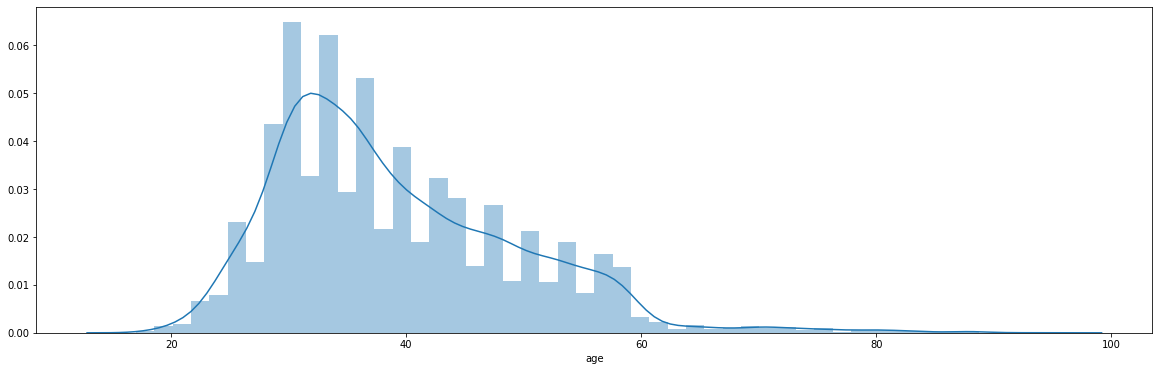

In [14]:
plt.figure(figsize = (20,6))
sns.distplot(bank1['age'])
plt.savefig('Age Distribution.png')

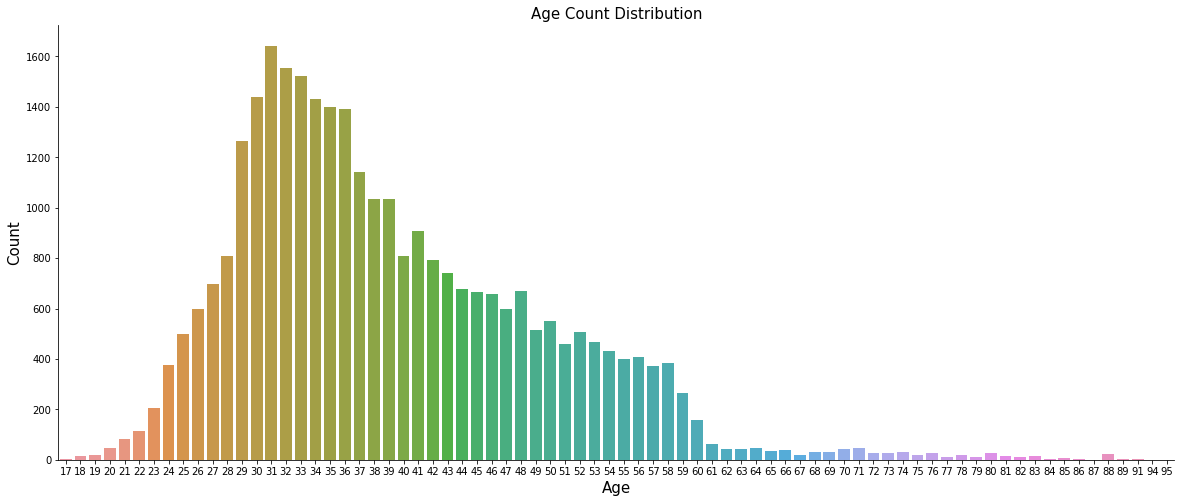

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank1)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()
plt.savefig('Age Count Distribution.png')

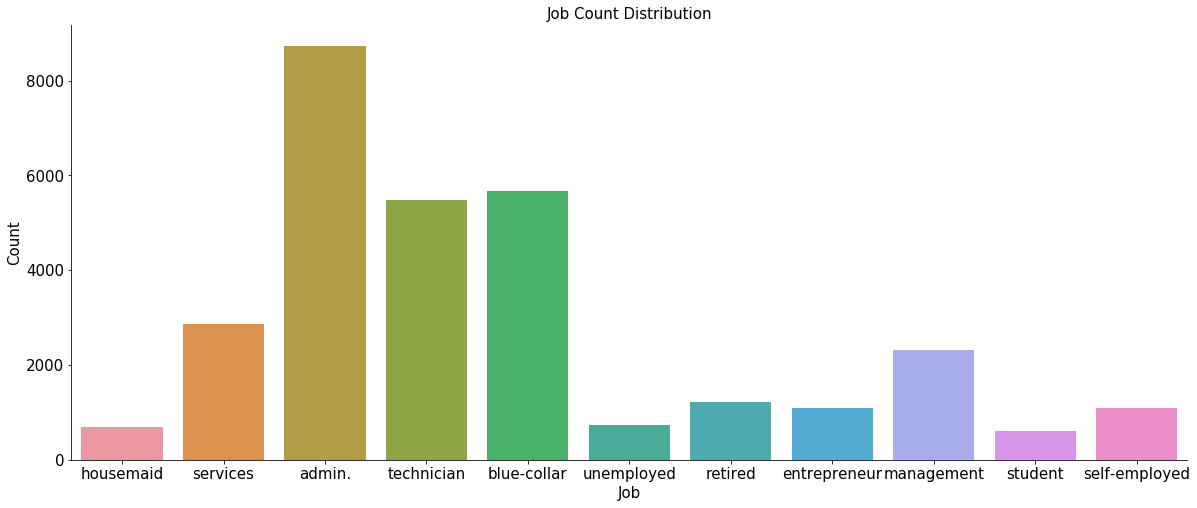

In [16]:
# What kind of jobs clients this bank have, if you cross jobs with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank1)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()
plt.savefig('Job Count Distribution.png')

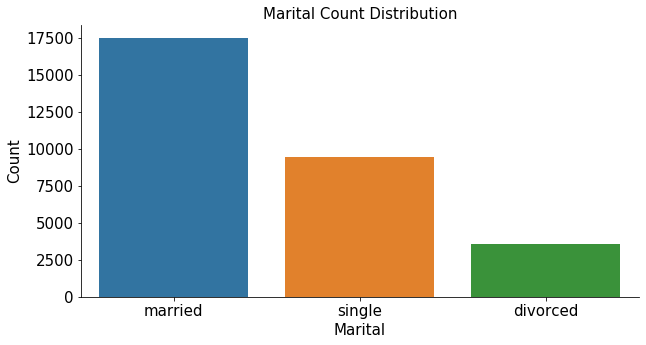

In [17]:
# What kind of 'marital clients' this bank have, if you cross marital with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank1)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()
plt.savefig('Marital Count Distribution.png')

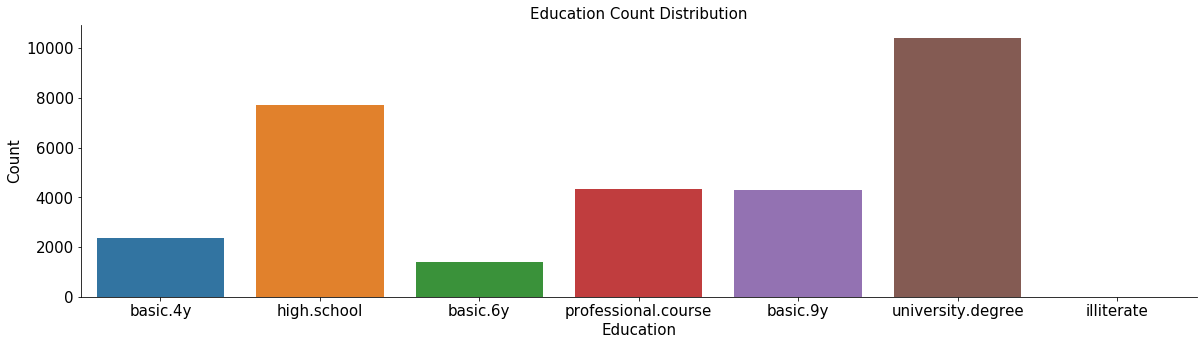

In [18]:
# What kind of 'education clients this bank have, if you cross education with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bank1)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()
plt.savefig('Education Count Distribution.png')

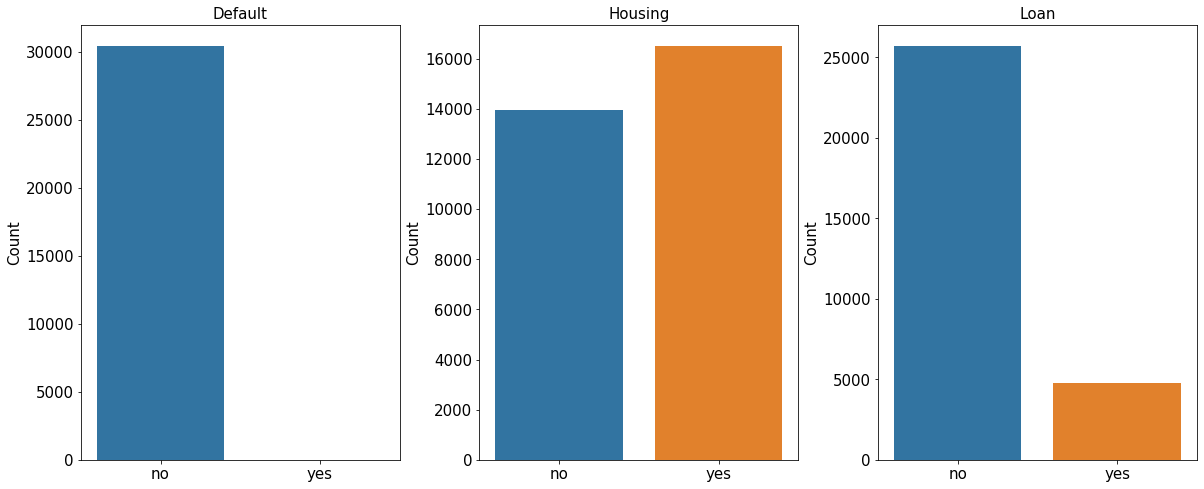

In [19]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = bank1, ax = ax1, order = ['no', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = bank1, ax = ax2, order = ['no', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = bank1, ax = ax3, order = ['no', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

plt.savefig('Default, Housing, Loan Distribution.png')

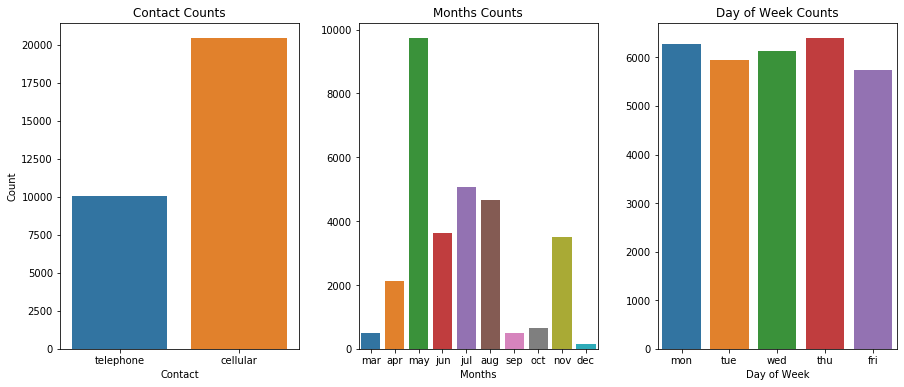

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(bank1['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(bank1['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(bank1['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

plt.savefig('Last Contact Distribution.png')

# __Encoding__

In [23]:
bank2 = bank1.copy()

In [24]:
bank2 = bank2.drop(columns=['duration'])

In [25]:
bank2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# __Encoding__

In [26]:
# Label encoder order is alphabetical
labelencoder_X = LabelEncoder()
bank2['job']      = labelencoder_X.fit_transform(bank2['job'])
bank2['default']  = labelencoder_X.fit_transform(bank2['default']) 
bank2['housing']  = labelencoder_X.fit_transform(bank2['housing']) 
bank2['loan']     = labelencoder_X.fit_transform(bank2['loan']) 
bank2['contact']  = labelencoder_X.fit_transform(bank2['contact']) 
bank2['marital']  = labelencoder_X.fit_transform(bank2['marital']) 

In [27]:
bank2['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'professional.course',
       'basic.9y', 'university.degree', 'illiterate'], dtype=object)

In [28]:
bank2['education'].replace(['basic.4y', 'basic.6y','basic.9y', 'high.school', 'university.degree', 'professional.course','illiterate'], [1,2,3,4,5,6,7], inplace  = True)

In [20]:
bank2['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [30]:
bank2['month'].replace(['jan','feb','mar', 'apr','may', 'jun', 'jul','aug', 'sep','oct', 'nov', 'dec'], [1,2,3,4,5,6,7,8,9,10,11,12], inplace  = True)

In [19]:
bank2['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [31]:
bank2['day_of_week'].replace(['mon', 'tue', 'wed', 'thu', 'fri'], [1,2,3,4,5], inplace  = True)

In [32]:
bank2['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [33]:
bank2['poutcome'].unique()

array([1, 2, 3], dtype=int64)

In [34]:
bank2['y'].replace(['no','yes'], [0,1], inplace  = True)

In [35]:
bank2.shape

(30488, 20)

In [36]:
bank2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,1,0,0,0,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,4,0,1,0,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,2,0,0,0,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,4,0,0,1,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,6,0,0,0,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,6,0,1,0,0,11,5,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,6,0,0,0,0,11,5,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,5,0,1,0,0,11,5,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,6,0,0,0,0,11,5,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


### __Scaling__

In [37]:
kolom = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

In [38]:
for i in kolom:
    bank2[i] = RobustScaler().fit_transform(bank2[[i]])

In [39]:
bank2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.357143,0.142857,0.0,-1.5,0.0,-1.0,0.0,1.0,-0.333333,-1.0,-0.5,0.0,0.0,0.0,0.0000,0.598477,0.857143,0.000274,0.000000,0
2,0.000000,0.714286,0.0,0.0,0.0,0.0,0.0,1.0,-0.333333,-1.0,-0.5,0.0,0.0,0.0,0.0000,0.598477,0.857143,0.000274,0.000000,0
3,0.214286,-0.285714,0.0,-1.0,0.0,-1.0,0.0,1.0,-0.333333,-1.0,-0.5,0.0,0.0,0.0,0.0000,0.598477,0.857143,0.000274,0.000000,0
4,1.357143,0.714286,0.0,0.0,0.0,-1.0,1.0,1.0,-0.333333,-1.0,-0.5,0.0,0.0,0.0,0.0000,0.598477,0.857143,0.000274,0.000000,0
6,1.571429,-0.285714,0.0,1.0,0.0,-1.0,0.0,1.0,-0.333333,-1.0,-0.5,0.0,0.0,0.0,0.0000,0.598477,0.857143,0.000274,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2.571429,0.428571,0.0,1.0,0.0,0.0,0.0,0.0,1.666667,1.0,-0.5,0.0,0.0,0.0,-0.6875,1.439608,-1.428571,-1.049342,-1.762791,1
41184,0.642857,-0.142857,0.0,1.0,0.0,-1.0,0.0,0.0,1.666667,1.0,-0.5,0.0,0.0,0.0,-0.6875,1.439608,-1.428571,-1.049342,-1.762791,0
41185,1.357143,0.428571,0.0,0.5,0.0,0.0,0.0,0.0,1.666667,1.0,0.0,0.0,0.0,0.0,-0.6875,1.439608,-1.428571,-1.049342,-1.762791,0
41186,0.500000,1.000000,0.0,1.0,0.0,-1.0,0.0,0.0,1.666667,1.0,-0.5,0.0,0.0,0.0,-0.6875,1.439608,-1.428571,-1.049342,-1.762791,1


### **Features Selection**

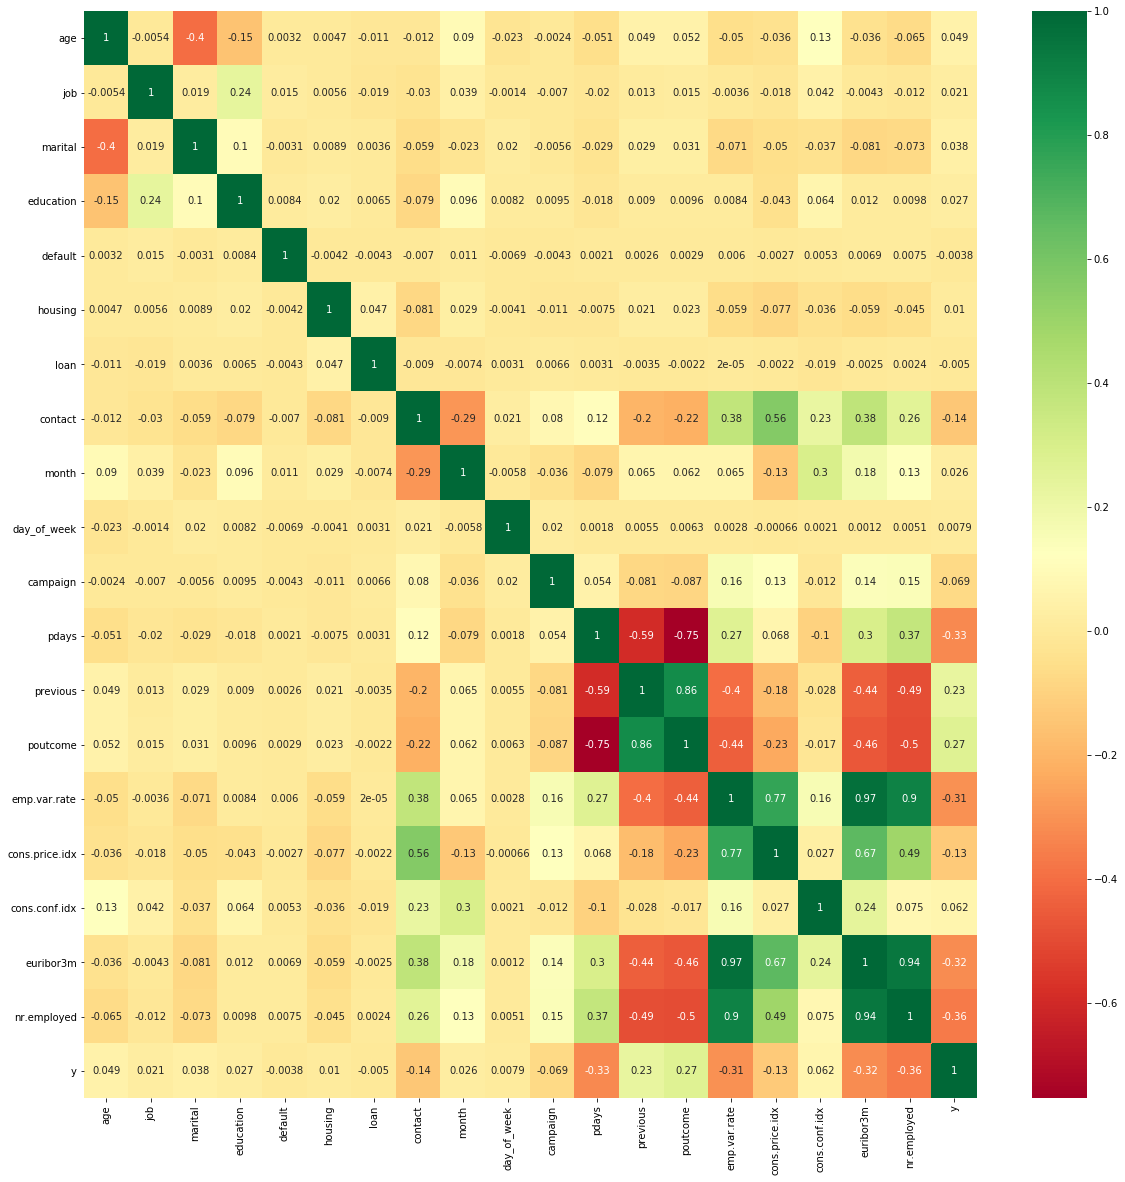

In [40]:
#get correlations of each features in dataset
corrmat = bank2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(bank2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [41]:
bank2 = bank2.drop(columns=['emp.var.rate', 'euribor3m'])

In [42]:
x = bank2.drop(['y'], axis=1)
y = bank2['y']

In [43]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[2.15163550e-01 9.35738849e-02 4.00241855e-02 8.21618271e-02
 1.84409706e-06 3.27784735e-02 2.17788473e-02 1.66834854e-02
 2.65300502e-02 9.04036752e-02 1.13104365e-01 5.96826132e-02
 1.63580863e-02 3.91684748e-02 3.13773619e-02 3.46355022e-02
 8.65737734e-02]


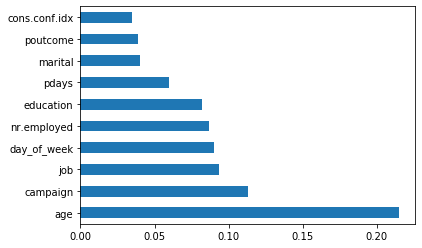

In [44]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
# feat_importances

In [45]:
bank3 = bank2[['age','campaign','job','day_of_week', 'nr.employed','education','pdays','marital','poutcome','cons.conf.idx', 'y']]

In [46]:
bank3

,age,campaign,job,day_of_week,nr.employed,education,pdays,marital,poutcome,cons.conf.idx,y
0,1.357143,-0.5,0.142857,-1.0,0.000000,-1.5,0.0,0.0,0.0,0.857143,0
2,0.000000,-0.5,0.714286,-1.0,0.000000,0.0,0.0,0.0,0.0,0.857143,0
3,0.214286,-0.5,-0.285714,-1.0,0.000000,-1.0,0.0,0.0,0.0,0.857143,0
4,1.357143,-0.5,0.714286,-1.0,0.000000,0.0,0.0,0.0,0.0,0.857143,0
6,1.571429,-0.5,-0.285714,-1.0,0.000000,1.0,0.0,0.0,0.0,0.857143,0
...,...,...,...,...,...,...,...,...,...,...,...
41183,2.571429,-0.5,0.428571,1.0,-1.762791,1.0,0.0,0.0,0.0,-1.428571,1
41184,0.642857,-0.5,-0.142857,1.0,-1.762791,1.0,0.0,0.0,0.0,-1.428571,0
41185,1.357143,0.0,0.428571,1.0,-1.762791,0.5,0.0,0.0,0.0,-1.428571,0
41186,0.500000,-0.5,1.000000,1.0,-1.762791,1.0,0.0,0.0,0.0,-1.428571,1


### __Splitting Dataset__

In [49]:
x = bank3.drop(['y'], axis=1)
y = bank3['y']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=0)

## **Handling Imbalance Target**

### **Check Target Proportion**

In [47]:
bank3['y'].value_counts()

0    26629
1     3859
Name: y, dtype: int64

In [48]:
x = [round(i/len(bank3)*100, 2) for i in bank3['y'].value_counts()]
pd.DataFrame(data=x, index=['No', 'Yes'], columns=['Data (%)'])

,Data (%)
No,87.34
Yes,12.66


## __Oversampling : SMOTE__

In [51]:
sm = SMOTE(random_state = 0)
x_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

## __Building Machine Learning__

In [52]:
# menyimpan model algoritma ke dalam variabel 'models'
models = [
    ['Logistic Regression : ', LogisticRegression()],
    ['DecisionTree : ', DecisionTreeClassifier()],
    ['RandomForest : ', RandomForestClassifier()],
    ['KNeighbors Classifier : ', KNeighborsClassifier()]
]

LogisticRegression()
 
               Score (%)
accuracy       73.597901
recall         70.923913
precision      27.215850
roc_auc_score  72.444426
f1_score       39.336850
 
              precision    recall  f1-score   support

           0       0.95      0.74      0.83      2681
           1       0.27      0.71      0.39       368

    accuracy                           0.74      3049
   macro avg       0.61      0.72      0.61      3049
weighted avg       0.87      0.74      0.78      3049



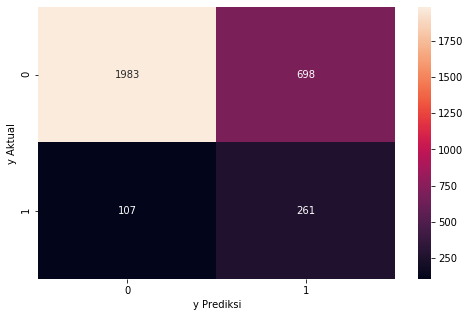

DecisionTreeClassifier()
 
               Score (%)
accuracy       82.223680
recall         31.793478
precision      28.676471
roc_auc_score  60.469660
f1_score       30.154639
 
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      2681
           1       0.29      0.32      0.30       368

    accuracy                           0.82      3049
   macro avg       0.60      0.60      0.60      3049
weighted avg       0.83      0.82      0.83      3049



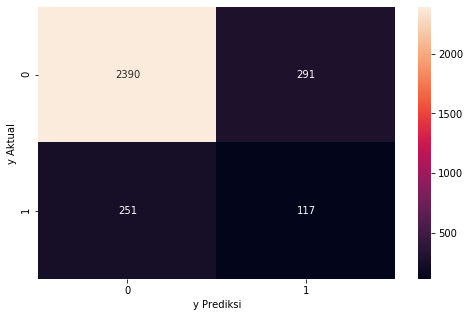

RandomForestClassifier()
 
               Score (%)
accuracy       86.684159
recall         38.315217
precision      44.062500
roc_auc_score  65.819302
f1_score       40.988372
 
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2681
           1       0.44      0.38      0.41       368

    accuracy                           0.87      3049
   macro avg       0.68      0.66      0.67      3049
weighted avg       0.86      0.87      0.86      3049



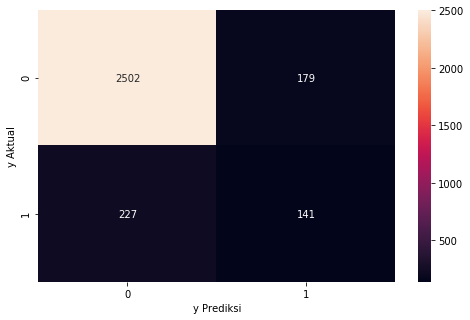

KNeighborsClassifier()
 
               Score (%)
accuracy       74.614628
recall         58.695652
precision      25.775656
roc_auc_score  67.747677
f1_score       35.820896
 
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      2681
           1       0.26      0.59      0.36       368

    accuracy                           0.75      3049
   macro avg       0.59      0.68      0.60      3049
weighted avg       0.85      0.75      0.78      3049



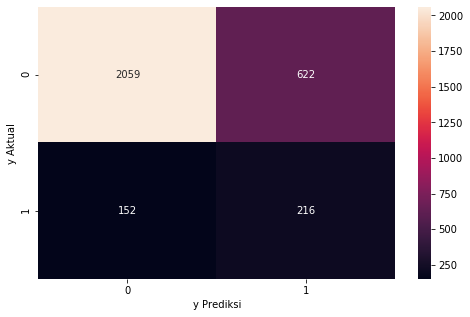

In [53]:
for name, model in models:
    model = model
     # model belajar dari data train
    model.fit(x_train_sm, y_train_sm)
    # membuat prediksi dan fungsinya untuk mengevaluasi model (dibandingkan dengan y aktual)
    y_pred = model.predict(X_test)
    
    hasil = pd.DataFrame(data = [accuracy_score(y_test, y_pred)*100, recall_score(y_test, y_pred)*100,
                        precision_score(y_test, y_pred)*100, roc_auc_score(y_test, y_pred)*100,
                        f1_score(y_test, y_pred)*100],
                        index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
                        columns = ['Score (%)'])
    print(model)
    print(" ")
    print(hasil)
    print(" ")
    # Confusion matrix report
    print(classification_report(y_test, y_pred))
    # untuk menampilkan visualisasi confusion matrix
    f, ax = plt.subplots(figsize=(8,5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
    plt.xlabel('y Prediksi')
    plt.ylabel('y Aktual')
    plt.show()

# __Hyperparameter Tuning : Grid Search & Setting Threshold__

## __Logistic Regression__

In [48]:
# parameter model logistic regression yang akan dituned + value di setiap parameter
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [1, 10, 100, 1000, 10000]

# simpan dalam variabel dengan nama 'param'
param = {'penalty': penalty, 'solver': solver, 'max_iter': max_iter}
param

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'max_iter': [1, 10, 100, 1000, 10000]}

In [49]:
model_LR = LogisticRegression()
model_LR_GS = GridSearchCV(model_LR, param, cv = 5)

In [50]:
model_LR_GS.fit(x_train_sm, y_train_sm)
model_LR_GS.best_params_

{'max_iter': 10000, 'penalty': 'l1', 'solver': 'saga'}

model_LR_GS.fit(X_train, y_train)
model_LR_GS.best_params_

In [54]:
model_LogReg_GS = LogisticRegression(solver='saga', penalty = 'l1', max_iter = 10000)
model_LogReg_GS.fit(x_train_sm, y_train_sm)

LogisticRegression(max_iter=10000, penalty='l1', solver='saga')

In [55]:
y_pred_GS = model_LogReg_GS.predict(X_test)

pd.DataFrame(data = [accuracy_score(y_test, y_pred_GS)*100, recall_score(y_test, y_pred_GS)*100,
                    precision_score(y_test, y_pred_GS)*100, roc_auc_score(y_test, y_pred_GS)*100,
                    f1_score(y_test, y_pred_GS)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,73.466710
recall,71.195652
precision,27.150259
roc_auc_score,72.487047
f1_score,39.309827


              precision    recall  f1-score   support

           0       0.95      0.74      0.83      2681
           1       0.27      0.71      0.39       368

    accuracy                           0.73      3049
   macro avg       0.61      0.72      0.61      3049
weighted avg       0.87      0.73      0.78      3049



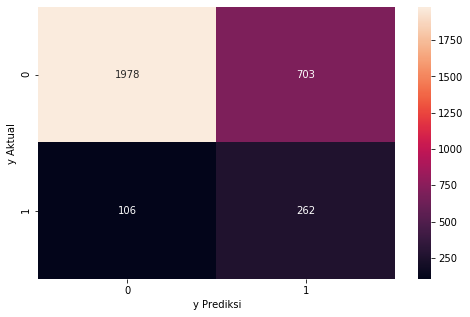

In [56]:
# Confusion matrix report
print(classification_report(y_test, y_pred_GS))
# untuk menampilkan visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_GS), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

### __Setting Threshold__ (Probability to Predict 1 (``Positive``))

In [83]:
THRESHOLD = 0.7
y_pred_new = np.where(model_LogReg_GS.predict_proba(X_test)[:, 1] > THRESHOLD, 1, 0)

In [84]:
pd.DataFrame(data = [accuracy_score(y_test, y_pred_new)*100, recall_score(y_test, y_pred_new)*100,
                     precision_score(y_test, y_pred_new)*100, roc_auc_score(y_test, y_pred_new)*100,
                    f1_score(y_test, y_pred_new)*100],
             index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1 score'],
             columns = ['Score (%)']
            )

,Score (%)
accuracy,87.012135
recall,42.934783
precision,45.930233
roc_auc_score,67.998536
f1 score,44.382022


              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2681
           1       0.46      0.43      0.44       368

    accuracy                           0.87      3049
   macro avg       0.69      0.68      0.69      3049
weighted avg       0.87      0.87      0.87      3049



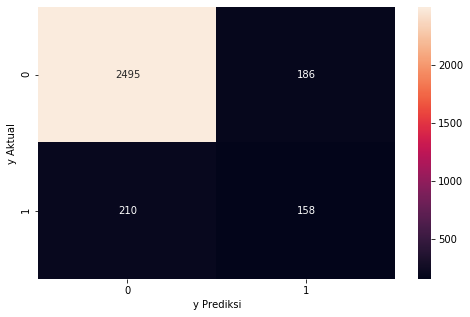

In [85]:
# Confusion matrix report
print(classification_report(y_test, y_pred_new))
# untuk menampilkan visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_new), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

## __Random Forest Classifier__

In [57]:
# parameter model Random Forest Classifier yang akan dituned + value di setiap parameter

bootstrap = [True, False]
max_features = ['auto', 'sqrt', 'log2']
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 5, 10]


# simpan dalam variabel dengan nama 'param'
param = {'bootstrap': bootstrap,
 'max_features': max_features, 
 'min_samples_leaf': min_samples_leaf,
 'min_samples_split': min_samples_split}
param

{'bootstrap': [True, False],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}

In [58]:
model_RF =  RandomForestClassifier()
model_RF_GS = GridSearchCV(model_RF, param, cv = 5)

In [59]:
model_RF_GS.fit(x_train_sm, y_train_sm)
model_RF_GS.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [60]:
model_RF_GS = RandomForestClassifier(bootstrap=False, max_features='sqrt', min_samples_leaf=2, min_samples_split=2)
model_RF_GS.fit(x_train_sm, y_train_sm)

RandomForestClassifier(bootstrap=False, max_features='sqrt', min_samples_leaf=2)

In [61]:
y_pred_GS = model_RF_GS.predict(X_test)

pd.DataFrame(data = [accuracy_score(y_test, y_pred_GS)*100, recall_score(y_test, y_pred_GS)*100,
                    precision_score(y_test, y_pred_GS)*100, roc_auc_score(y_test, y_pred_GS)*100,
                    f1_score(y_test, y_pred_GS)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,86.880945
recall,35.869565
precision,44.594595
roc_auc_score,64.876222
f1_score,39.759036


              precision    recall  f1-score   support

           0       0.91      0.94      0.93      2681
           1       0.45      0.36      0.40       368

    accuracy                           0.87      3049
   macro avg       0.68      0.65      0.66      3049
weighted avg       0.86      0.87      0.86      3049



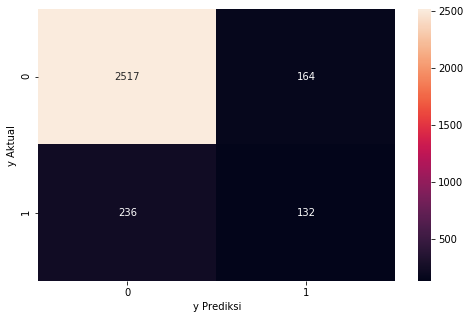

In [62]:
# Confusion matrix report
print(classification_report(y_test, y_pred_GS))
# untuk menampilkan visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_GS), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

### __Setting Threshold__ (Probability to Predict 1 (``Positive``))

In [90]:
THRESHOLD = 0.4
y_pred_new = np.where(model_RF_GS.predict_proba(X_test)[:, 1] > THRESHOLD, 1, 0)

In [91]:
pd.DataFrame(data = [accuracy_score(y_test, y_pred_new)*100, recall_score(y_test, y_pred_new)*100,
                     precision_score(y_test, y_pred_new)*100, roc_auc_score(y_test, y_pred_new)*100,
                    f1_score(y_test, y_pred_new)*100],
             index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1 score'],
             columns = ['Score (%)']
            )

,Score (%)
accuracy,85.306658
recall,47.010870
precision,40.610329
roc_auc_score,68.787046
f1 score,43.576826


              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2681
           1       0.41      0.47      0.44       368

    accuracy                           0.85      3049
   macro avg       0.67      0.69      0.68      3049
weighted avg       0.86      0.85      0.86      3049



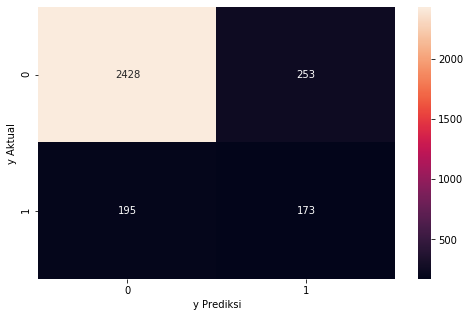

In [92]:
# Confusion matrix report
print(classification_report(y_test, y_pred_new))
# untuk menampilkan visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_new), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

## __Decision Tree Classifier__

In [66]:
# parameter model decision tree yang akan dituned + value di setiap parameter
min_samples_split = [2, 3, 4]
min_samples_leaf = [1, 5, 10, 20, 50, 100]
max_depth = [4,6,8,12]

# simpan dalam variabel dengan nama 'param'
param = {'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'max_depth': max_depth}
param

{'min_samples_split': [2, 3, 4],
 'min_samples_leaf': [1, 5, 10, 20, 50, 100],
 'max_depth': [4, 6, 8, 12]}

In [67]:
model_DT = DecisionTreeClassifier()
model_DT_GS = GridSearchCV(model_DT, param, cv = 5)

In [68]:
model_DT_GS.fit(x_train_sm, y_train_sm)
model_DT_GS.best_params_

{'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 3}

In [66]:
model_DT_GS = DecisionTreeClassifier(max_depth = 12, min_samples_leaf = 1, min_samples_split = 3, criterion = 'entropy')
model_DT_GS.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_split=3)

In [67]:
y_pred_GS = model_DT_GS.predict(X_test)

pd.DataFrame(data = [accuracy_score(y_test, y_pred_GS)*100, recall_score(y_test, y_pred_GS)*100,
                    precision_score(y_test, y_pred_GS)*100, roc_auc_score(y_test, y_pred_GS)*100,
                    f1_score(y_test, y_pred_GS)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,84.585110
recall,47.826087
precision,38.766520
roc_auc_score,68.728411
f1_score,42.822384


              precision    recall  f1-score   support

           0       0.93      0.90      0.91      2681
           1       0.39      0.48      0.43       368

    accuracy                           0.85      3049
   macro avg       0.66      0.69      0.67      3049
weighted avg       0.86      0.85      0.85      3049



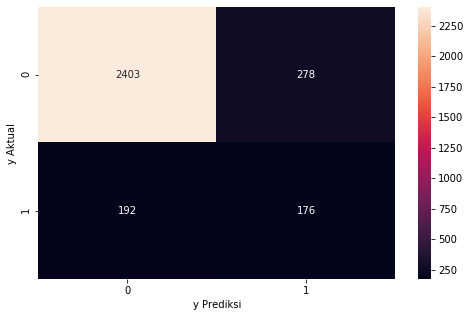

In [68]:
# Confusion matrix report
print(classification_report(y_test, y_pred_GS))
# untuk menampilkan visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_GS), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

### __Setting Threshold__ (Probability to Predict 1 (``Positive``))

In [107]:
THRESHOLD = 0.4
y_pred_new = np.where(model_DT_GS.predict_proba(X_test)[:, 1] > THRESHOLD, 1, 0)

In [108]:
pd.DataFrame(data = [accuracy_score(y_test, y_pred_new)*100, recall_score(y_test, y_pred_new)*100,
                     precision_score(y_test, y_pred_new)*100, roc_auc_score(y_test, y_pred_new)*100,
                    f1_score(y_test, y_pred_new)*100],
             index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1 score'],
             columns = ['Score (%)']
            )

,Score (%)
accuracy,83.797967
recall,51.630435
precision,37.549407
roc_auc_score,69.921894
f1 score,43.478261


              precision    recall  f1-score   support

           0       0.93      0.90      0.91      2681
           1       0.39      0.48      0.43       368

    accuracy                           0.85      3049
   macro avg       0.66      0.69      0.67      3049
weighted avg       0.86      0.85      0.85      3049



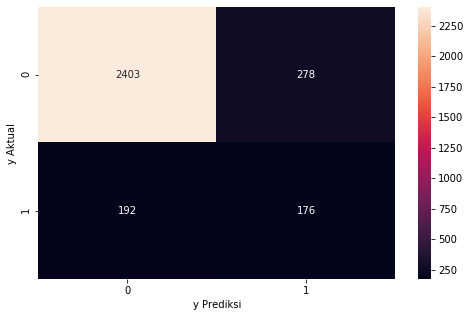

In [71]:
# Confusion matrix report
print(classification_report(y_test, y_pred_new))
# untuk menampilkan visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_new), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

## __KNeighbors Classifier__

<hr>

## __Deciding K Value__
Berapa nilai K (jumlah tetangga) yang digunakan untuk memprediksi suatu data?

1. sqrt(n) : akar pangkat 2 dari total data training
2. pilih nilai yang ganjil

In [79]:
# misalnya hasilnya genap, perlu ditambah + 1
k = round(len(x_train_sm) ** 0.5)
k

219

In [80]:
# parameter model yang akan dituned + value di setiap parameter

p = [1,2]
metric = ['euclidean', 'manhattan', 'minkowski']
weights = ['uniform', 'distance']


# simpan dalam variabel dengan nama 'param'
param = {'p': p, 'metric': metric, 'weights':weights}
param

{'p': [1, 2],
 'metric': ['euclidean', 'manhattan', 'minkowski'],
 'weights': ['uniform', 'distance']}

In [81]:
model_k = KNeighborsClassifier()
model_k_GS = GridSearchCV(model_k, param, cv = 5)

In [82]:
model_k_GS.fit(x_train_sm, y_train_sm)
model_k_GS.best_params_

{'metric': 'manhattan', 'p': 1, 'weights': 'distance'}

In [72]:
model_k_GS = KNeighborsClassifier(n_neighbors = 219, leaf_size=1000, p=1, metric='manhattan', weights='distance')
model_k_GS.fit(x_train_sm, y_train_sm)

KNeighborsClassifier(leaf_size=1000, metric='manhattan', n_neighbors=219, p=1,
                     weights='distance')

In [73]:
y_pred_GS = model_RF_GS.predict(X_test)

pd.DataFrame(data = [accuracy_score(y_test, y_pred_GS)*100, recall_score(y_test, y_pred_GS)*100,
                    precision_score(y_test, y_pred_GS)*100, roc_auc_score(y_test, y_pred_GS)*100,
                    f1_score(y_test, y_pred_GS)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,86.880945
recall,35.869565
precision,44.594595
roc_auc_score,64.876222
f1_score,39.759036


              precision    recall  f1-score   support

           0       0.91      0.94      0.93      2681
           1       0.45      0.36      0.40       368

    accuracy                           0.87      3049
   macro avg       0.68      0.65      0.66      3049
weighted avg       0.86      0.87      0.86      3049



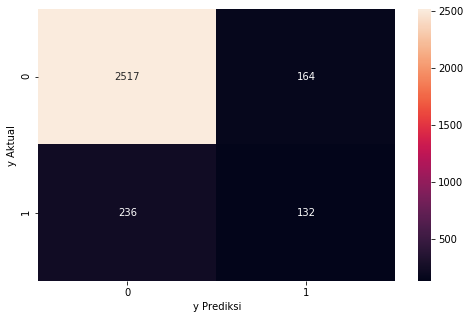

In [74]:
# Confusion matrix report
print(classification_report(y_test, y_pred_GS))
# untuk menampilkan visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_GS), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

### __Setting Threshold__ (Probability to Predict 1 (``Positive``))

In [113]:
THRESHOLD = 0.4
y_pred_new = np.where(model_RF_GS.predict_proba(X_test)[:, 1] > THRESHOLD, 1, 0)

In [114]:
pd.DataFrame(data = [accuracy_score(y_test, y_pred_new)*100, recall_score(y_test, y_pred_new)*100,
                     precision_score(y_test, y_pred_new)*100, roc_auc_score(y_test, y_pred_new)*100,
                    f1_score(y_test, y_pred_new)*100],
             index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1 score'],
             columns = ['Score (%)']
            )

,Score (%)
accuracy,85.306658
recall,47.010870
precision,40.610329
roc_auc_score,68.787046
f1 score,43.576826


              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2681
           1       0.41      0.47      0.44       368

    accuracy                           0.85      3049
   macro avg       0.67      0.69      0.68      3049
weighted avg       0.86      0.85      0.86      3049



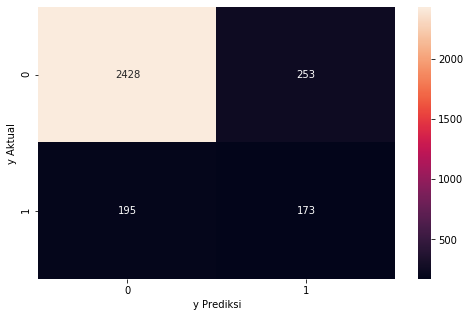

In [77]:
# Confusion matrix report
print(classification_report(y_test, y_pred_new))
# untuk menampilkan visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_new), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

<hr>

# **``Saving Model``**

# __Encoding__

In [115]:
bank4 = bank1.copy()

In [116]:
bank4 = bank4.drop(columns=['duration'])

In [117]:
bank4.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [118]:
# Label encoder order is alphabetical
labelencoder_X = LabelEncoder()
bank4['job']      = labelencoder_X.fit_transform(bank4['job'])
bank4['default']  = labelencoder_X.fit_transform(bank4['default']) 
bank4['housing']  = labelencoder_X.fit_transform(bank4['housing']) 
bank4['loan']     = labelencoder_X.fit_transform(bank4['loan']) 
bank4['contact']  = labelencoder_X.fit_transform(bank4['contact']) 
bank4['marital']  = labelencoder_X.fit_transform(bank4['marital']) 

In [119]:
bank4['education'].replace(['basic.4y', 'basic.6y','basic.9y', 'high.school', 'university.degree', 'professional.course','illiterate'], [1,2,3,4,5,6,7], inplace  = True)

In [120]:
bank4['month'].replace(['jan','feb','mar', 'apr','may', 'jun', 'jul','aug', 'sep','oct', 'nov', 'dec'], [1,2,3,4,5,6,7,8,9,10,11,12], inplace  = True)

In [121]:
bank4['day_of_week'].replace(['mon', 'tue', 'wed', 'thu', 'fri'], [1,2,3,4,5], inplace  = True)

In [122]:
bank4['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [123]:
bank4['y'].replace(['no','yes'], [0,1], inplace  = True)

In [125]:
bank4.shape

(30488, 20)

In [126]:
bank4

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,1,0,0,0,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,4,0,1,0,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,2,0,0,0,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,4,0,0,1,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,6,0,0,0,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,6,0,1,0,0,11,5,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,6,0,0,0,0,11,5,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,5,0,1,0,0,11,5,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,6,0,0,0,0,11,5,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [127]:
bank5 = bank4[['age','campaign','job','day_of_week', 'nr.employed','education','pdays','marital','poutcome','cons.conf.idx', 'y']]
bank5

,age,campaign,job,day_of_week,nr.employed,education,pdays,marital,poutcome,cons.conf.idx,y
0,56,1,3,1,5191.0,1,999,1,1,-36.4,0
2,37,1,7,1,5191.0,4,999,1,1,-36.4,0
3,40,1,0,1,5191.0,2,999,1,1,-36.4,0
4,56,1,7,1,5191.0,4,999,1,1,-36.4,0
6,59,1,0,1,5191.0,6,999,1,1,-36.4,0
...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,5,5,4963.6,6,999,1,1,-50.8,1
41184,46,1,1,5,4963.6,6,999,1,1,-50.8,0
41185,56,2,5,5,4963.6,5,999,1,1,-50.8,0
41186,44,1,9,5,4963.6,6,999,1,1,-50.8,1


### __Splitting Dataset__

In [128]:
x = bank5.drop(['y'], axis=1)
y = bank5['y']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=0)

## __Over Sampling : SMOTE__

In [130]:
sm = SMOTE(random_state = 0)
x_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [131]:
model_DT_GS_noscale = DecisionTreeClassifier(max_depth = 12, min_samples_leaf = 1, min_samples_split = 3, criterion = 'entropy')
model_DT_GS_noscale.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_split=3)

In [132]:
y_pred_GS = model_DT_GS_noscale.predict(X_test)

pd.DataFrame(data = [accuracy_score(y_test, y_pred_GS)*100, recall_score(y_test, y_pred_GS)*100,
                    precision_score(y_test, y_pred_GS)*100, roc_auc_score(y_test, y_pred_GS)*100,
                    f1_score(y_test, y_pred_GS)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,80.813381
recall,55.978261
precision,32.750397
roc_auc_score,70.100283
f1_score,41.323972


              precision    recall  f1-score   support

           0       0.93      0.84      0.89      2681
           1       0.33      0.56      0.41       368

    accuracy                           0.81      3049
   macro avg       0.63      0.70      0.65      3049
weighted avg       0.86      0.81      0.83      3049



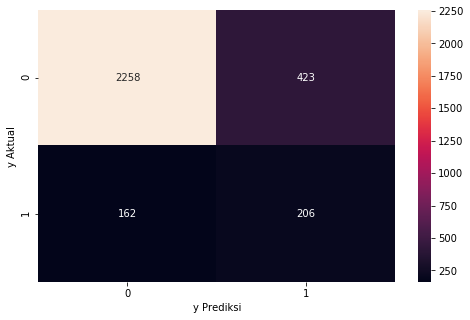

In [133]:
# Confusion matrix report
print(classification_report(y_test, y_pred_GS))
# untuk menampilkan visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_GS), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

In [9]:
columns=['age','campaign','nr.employed','pdays','cons.conf.idx']

for i in columns:
    print("Min ", i, bank1[i].min())
    print("Max ", i, bank1[i].max())
    
columns2=['job','day_of_week', 'education','marital','poutcome']
for i in columns2:
    print("Unique Value", i, bank1[i].unique())

Min  age 17
Max  age 95
Min  campaign 1
Max  campaign 43
Min  nr.employed 4963.6
Max  nr.employed 5228.1
Min  pdays 0
Max  pdays 999
Min  cons.conf.idx -50.8
Max  cons.conf.idx -26.9
Unique Value job ['housemaid' 'services' 'admin.' 'technician' 'blue-collar' 'unemployed'
 'retired' 'entrepreneur' 'management' 'student' 'self-employed']
Unique Value day_of_week ['mon' 'tue' 'wed' 'thu' 'fri']
Unique Value education ['basic.4y' 'high.school' 'basic.6y' 'professional.course' 'basic.9y'
 'university.degree' 'illiterate']
Unique Value marital ['married' 'single' 'divorced']
Unique Value poutcome ['nonexistent' 'failure' 'success']


<hr>

# **``Saving Model``**

### **1. Saving Model using Joblib**

In [134]:
# menyimpan model
import joblib

joblib.dump(model_DT_GS_noscale, 'model_DT_Joblib')

['model_DT_Joblib']

### **2. Using Joblib Model**

In [136]:
# simulasi menggunakan model

model_joblib = joblib.load('model_DT_Joblib')

# user input data

age = int(input('Ketik Age (17-95): '))
campaign = int(input('Ketik Campaign (1-43): '))
number_of_employees = int(input('Ketik Number of Employees (4963-5228): '))
job = int(input('Ketik Job (0=admin, 1=blue-collar, 2=entrepreneur, 3=housemaid, 4=management, 5=retired, 6=self-employed, 7=services, 8=student, 9=technician, 10=unemployed): '))
day_of_week = int(input('Ketik Day of Week (1=mon, 2=tue, 3=wed, 4=thu, 5=fri]): '))
education = int(input('Ketik Education (1=basic.4y, 2=basic.6y, 3=basic.9y, 4=high.school, 5=university.degree, 6=professional.course,7=illiterate): '))
days_last_contacted = int(input('Ketik Days Last Contacted (0-999): '))
marital = int(input('Marital (0=divorced, 1=married, 2=single): '))
outcome = int(input('Outcome (0=nonexistent, 1=failure, 2=success): '))
Consumer_Confidence_Index = int(input('Consumer Confidence Index ((-51)-(-26)): '))

df = [[age,campaign,job,day_of_week, number_of_employees,education,days_last_contacted,marital,outcome,Consumer_Price_Index]]

if model_joblib.predict(df)[0] == 1:
    hasil = 'Subscribe'
else:
    hasil = 'Not Subscribe'

print('Hasil Prediksi: ', hasil)
print('Probabilitas Prediksi: ', round(model_joblib.predict_proba(df).tolist()[0][0]*100, 2))

Ketik Age (17-95):  95
Ketik Campaign (1-43):  1
Ketik Number of Employees (4963-5228):  4963
Ketik Job (0=admin, 1=blue-collar, 2=entrepreneur, 3=housemaid, 4=management, 5=retired, 6=self-employed, 7=services, 8=student, 9=technician, 10=unemployed):  7
Ketik Day of Week (1=mon, 2=tue, 3=wed, 4=thu, 5=fri]):  5
Ketik Education (1=basic.4y, 2=basic.6y, 3=basic.9y, 4=high.school, 5=university.degree, 6=professional.course,7=illiterate):  1
Ketik Days Last Contacted (0-999):  888
Marital (0=divorced, 1=married, 2=single):  2
Outcome (0=nonexistent, 1=failure, 2=success):  2
Consumer Confidence Index (92-94):  92


Hasil Prediksi:  Not Subscribe
Probabilitas Prediksi:  100.0
